In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import make_interp_spline
import textwrap

In [39]:
data1 = pd.read_csv('F:/python nhom4/data/archive/thpt2020.csv')
data2 = pd.read_csv('F:/python nhom4/data/archive/thpt2021.csv')
data3 = pd.read_csv('F:/python nhom4/data/archive/thpt2022.csv')
data4 = pd.read_csv('F:/python nhom4/data/archive/thpt2023.csv')
data5 = pd.read_csv('F:/python nhom4/data/archive/thpt2024.csv')

In [40]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870486 entries, 0 to 870485
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   SBD            870486 non-null  int64  
 1   Toan           866581 non-null  float64
 2   NguVan         856565 non-null  float64
 3   VatLy          293287 non-null  float64
 4   HoaHoc         295536 non-null  float64
 5   SinhHoc        290377 non-null  float64
 6   LichSu         568581 non-null  float64
 7   DiaLy          555072 non-null  float64
 8   GDCD           482980 non-null  float64
 9   NgoaiNgu       772098 non-null  float64
 10  MaMonNgoaiNgu  772098 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 73.1+ MB


In [41]:
data1.sort_values(by = "SBD", ascending= True).head(5)

,SBD,Toan,NguVan,VatLy,HoaHoc,SinhHoc,LichSu,DiaLy,GDCD,NgoaiNgu,MaMonNgoaiNgu
0,2001000001,7.0,6.0,NaN,NaN,NaN,8.00,NaN,NaN,NaN,NaN
1,2001000002,9.0,6.0,7.25,8.75,7.25,NaN,NaN,NaN,9.4,N1
2,2001000003,8.8,6.5,8.25,8.75,4.75,NaN,NaN,NaN,6.0,N1
3,2001000004,7.0,NaN,NaN,6.00,NaN,NaN,NaN,NaN,8.2,N1
4,2001000005,9.0,7.5,NaN,NaN,NaN,5.75,7.25,9.25,9.2,N1


In [42]:
data1 = data1[['SBD', 'Toan', 'NguVan', 'VatLy', 'HoaHoc', 'SinhHoc', 'LichSu', 'DiaLy', 'GDCD', 'NgoaiNgu']]
data1.columns = ['sbd', 'toan', 'ngu_van', 'vat_ly', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_ly', 'gdcd', 'ngoai_ngu']
data1.sort_values(by = "sbd", ascending= True).head(5)

,sbd,toan,ngu_van,vat_ly,hoa_hoc,sinh_hoc,lich_su,dia_ly,gdcd,ngoai_ngu
0,2001000001,7.0,6.0,NaN,NaN,NaN,8.00,NaN,NaN,NaN
1,2001000002,9.0,6.0,7.25,8.75,7.25,NaN,NaN,NaN,9.4
2,2001000003,8.8,6.5,8.25,8.75,4.75,NaN,NaN,NaN,6.0
3,2001000004,7.0,NaN,NaN,6.00,NaN,NaN,NaN,NaN,8.2
4,2001000005,9.0,7.5,NaN,NaN,NaN,5.75,7.25,9.25,9.2


In [43]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914558 entries, 0 to 914557
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   SBD        914558 non-null  int64  
 1   Toan       905266 non-null  float64
 2   Ngu_Van    901990 non-null  float64
 3   Ngoai_Ngu  804285 non-null  float64
 4   Vat_Ly     324838 non-null  float64
 5   Hoa_Hoc    326386 non-null  float64
 6   Sinh_Hoc   321287 non-null  float64
 7   Lich_Su    582217 non-null  float64
 8   Dia_Ly     576878 non-null  float64
 9   GDCD       488194 non-null  float64
 10  Cum_Thi    914558 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 76.8 MB


In [44]:
data2.sort_values(by = "SBD", ascending= True).head(5)

,SBD,Toan,Ngu_Van,Ngoai_Ngu,Vat_Ly,Hoa_Hoc,Sinh_Hoc,Lich_Su,Dia_Ly,GDCD,Cum_Thi
0,1000001,2.2,3.50,NaN,NaN,NaN,NaN,2.50,5.50,NaN,1
1,1000002,9.2,8.25,10.0,NaN,NaN,NaN,5.75,9.75,9.25,1
2,1000003,4.4,6.25,NaN,NaN,NaN,NaN,4.25,4.00,NaN,1
3,1000004,8.4,6.75,10.0,4.00,3.00,3.50,NaN,NaN,NaN,1
4,1000005,8.8,8.25,9.4,8.25,5.75,5.25,NaN,NaN,NaN,1


In [45]:
data2 = data2[['SBD', 'Toan', 'Ngu_Van' , 'Ngoai_Ngu', 'Vat_Ly', 'Hoa_Hoc', 'Sinh_Hoc', 'Lich_Su', 'Dia_Ly', 'GDCD']]
data2.columns = ['sbd', 'toan', 'ngu_van', 'ngoai_ngu', 'vat_ly', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_ly', 'gdcd']
data2.sort_values(by = "sbd", ascending= True).head(5)

,sbd,toan,ngu_van,ngoai_ngu,vat_ly,hoa_hoc,sinh_hoc,lich_su,dia_ly,gdcd
0,1000001,2.2,3.50,NaN,NaN,NaN,NaN,2.50,5.50,NaN
1,1000002,9.2,8.25,10.0,NaN,NaN,NaN,5.75,9.75,9.25
2,1000003,4.4,6.25,NaN,NaN,NaN,NaN,4.25,4.00,NaN
3,1000004,8.4,6.75,10.0,4.00,3.00,3.50,NaN,NaN,NaN
4,1000005,8.8,8.25,9.4,8.25,5.75,5.25,NaN,NaN,NaN


In [46]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995441 entries, 0 to 995440
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   sbd        995441 non-null  int64  
 1   toan       982726 non-null  float64
 2   ngu_van    981407 non-null  float64
 3   ngoai_ngu  870609 non-null  float64
 4   vat_li     325523 non-null  float64
 5   hoa_hoc    327367 non-null  float64
 6   sinh_hoc   322198 non-null  float64
 7   lich_su    659662 non-null  float64
 8   dia_li     657421 non-null  float64
 9   gdcd       554343 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 75.9 MB


In [47]:
data3.sort_values(by = "sbd", ascending= True).head(5)

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd
0,1000001,3.6,5.00,4.0,NaN,NaN,NaN,2.75,6.0,8.75
1,1000002,8.4,6.75,7.6,NaN,NaN,NaN,8.50,7.5,8.25
2,1000003,5.8,7.50,5.0,NaN,NaN,NaN,7.25,5.5,8.75
3,1000004,7.4,7.50,8.6,NaN,NaN,NaN,7.50,6.5,7.50
4,1000005,7.2,8.50,9.0,NaN,NaN,NaN,8.00,8.5,8.25


In [48]:
data3[['sbd', 'toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']]
data3.columns = ['sbd', 'toan', 'ngu_van', 'ngoai_ngu', 'vat_ly', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_ly', 'gdcd']
data3.sort_values(by = 'sbd', ascending= True).head(5)

,sbd,toan,ngu_van,ngoai_ngu,vat_ly,hoa_hoc,sinh_hoc,lich_su,dia_ly,gdcd
0,1000001,3.6,5.00,4.0,NaN,NaN,NaN,2.75,6.0,8.75
1,1000002,8.4,6.75,7.6,NaN,NaN,NaN,8.50,7.5,8.25
2,1000003,5.8,7.50,5.0,NaN,NaN,NaN,7.25,5.5,8.75
3,1000004,7.4,7.50,8.6,NaN,NaN,NaN,7.50,6.5,7.50
4,1000005,7.2,8.50,9.0,NaN,NaN,NaN,8.00,8.5,8.25


In [49]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022060 entries, 0 to 1022059
Data columns (total 11 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   sbd           1022060 non-null  int64  
 1   toan          1003373 non-null  float64
 2   ngu_van       1008239 non-null  float64
 3   ngoai_ngu     880997 non-null   float64
 4   vat_li        327189 non-null   float64
 5   hoa_hoc       328118 non-null   float64
 6   sinh_hoc      324625 non-null   float64
 7   lich_su       683447 non-null   float64
 8   dia_li        682134 non-null   float64
 9   gdcd          565452 non-null   float64
 10  ma_ngoai_ngu  880997 non-null   object 
dtypes: float64(9), int64(1), object(1)
memory usage: 85.8+ MB


In [50]:
data4.sort_values(by = "sbd", ascending= True).head(5)

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu
0,1000001,8.4,8.50,9.2,NaN,NaN,NaN,6.75,6.00,9.00,N1
1,1000002,7.2,8.50,9.2,NaN,NaN,NaN,8.75,6.50,8.50,N1
2,1000003,NaN,6.50,NaN,NaN,NaN,NaN,9.25,7.50,NaN,NaN
3,1000004,7.8,8.25,7.8,NaN,NaN,NaN,4.50,6.25,8.25,N1
4,1000005,7.2,8.00,7.8,NaN,NaN,NaN,4.75,6.75,8.25,N1


In [51]:
data4 = data4[['sbd', 'toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']]
data4.columns = ['sbd', 'toan', 'ngu_van', 'ngoai_ngu', 'vat_ly', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_ly', 'gdcd']
data4.sort_values(by = "sbd", ascending= True).head(5)

,sbd,toan,ngu_van,ngoai_ngu,vat_ly,hoa_hoc,sinh_hoc,lich_su,dia_ly,gdcd
0,1000001,8.4,8.50,9.2,NaN,NaN,NaN,6.75,6.00,9.00
1,1000002,7.2,8.50,9.2,NaN,NaN,NaN,8.75,6.50,8.50
2,1000003,NaN,6.50,NaN,NaN,NaN,NaN,9.25,7.50,NaN
3,1000004,7.8,8.25,7.8,NaN,NaN,NaN,4.50,6.25,8.25
4,1000005,7.2,8.00,7.8,NaN,NaN,NaN,4.75,6.75,8.25


In [52]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061605 entries, 0 to 1061604
Data columns (total 11 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   sbd           1061605 non-null  int64  
 1   toan          1045613 non-null  float64
 2   ngu_van       1050101 non-null  float64
 3   ngoai_ngu     912705 non-null   float64
 4   vat_li        345615 non-null   float64
 5   hoa_hoc       346518 non-null   float64
 6   sinh_hoc      342378 non-null   float64
 7   lich_su       706214 non-null   float64
 8   dia_li        704682 non-null   float64
 9   gdcd          583609 non-null   float64
 10  ma_ngoai_ngu  912705 non-null   object 
dtypes: float64(9), int64(1), object(1)
memory usage: 89.1+ MB


In [53]:
data5.sort_values(by = "sbd", ascending= True).head(5)

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu
0,1000001,8.4,6.75,8.0,6.0,5.25,5.0,NaN,NaN,NaN,N1
1,1000002,8.6,8.50,7.2,NaN,NaN,NaN,7.25,6.00,8.00,N1
2,1000003,8.2,8.75,8.2,NaN,NaN,NaN,7.25,7.25,8.75,N1
3,1000004,4.8,8.50,7.4,NaN,NaN,NaN,7.00,6.00,7.50,N1
4,1000005,8.6,9.00,7.8,NaN,NaN,NaN,9.00,8.75,8.50,N1


In [54]:
data5 = data5[['sbd', 'toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']]
data5.columns = ['sbd', 'toan', 'ngu_van', 'ngoai_ngu', 'vat_ly', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_ly', 'gdcd']
data5.sort_values(by = "sbd", ascending= True).head(5)

,sbd,toan,ngu_van,ngoai_ngu,vat_ly,hoa_hoc,sinh_hoc,lich_su,dia_ly,gdcd
0,1000001,8.4,6.75,8.0,6.0,5.25,5.0,NaN,NaN,NaN
1,1000002,8.6,8.50,7.2,NaN,NaN,NaN,7.25,6.00,8.00
2,1000003,8.2,8.75,8.2,NaN,NaN,NaN,7.25,7.25,8.75
3,1000004,4.8,8.50,7.4,NaN,NaN,NaN,7.00,6.00,7.50
4,1000005,8.6,9.00,7.8,NaN,NaN,NaN,9.00,8.75,8.50


In [55]:
data1['year'] = '2020'
data2['year'] = '2021'
data3['year'] = '2022'
data4['year'] = '2023'
data5['year'] = '2024'

In [56]:
data_all = (
    pd.concat([data1, data2, data3, data4, data5], ignore_index= True)
)
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4864150 entries, 0 to 4864149
Data columns (total 11 columns):
 #   Column     Dtype  
---  ------     -----  
 0   sbd        int64  
 1   toan       float64
 2   ngu_van    float64
 3   vat_ly     float64
 4   hoa_hoc    float64
 5   sinh_hoc   float64
 6   lich_su    float64
 7   dia_ly     float64
 8   gdcd       float64
 9   ngoai_ngu  float64
 10  year       object 
dtypes: float64(9), int64(1), object(1)
memory usage: 408.2+ MB


In [57]:
data_all['sbd'] = data_all['sbd'].astype(str).str.zfill(8)
data_all['sbd'] = data_all['sbd'].str[-8:]
data_all.head(5)

,sbd,toan,ngu_van,vat_ly,hoa_hoc,sinh_hoc,lich_su,dia_ly,gdcd,ngoai_ngu,year
0,01000001,7.0,6.0,NaN,NaN,NaN,8.00,NaN,NaN,NaN,2020
1,01000002,9.0,6.0,7.25,8.75,7.25,NaN,NaN,NaN,9.4,2020
2,01000003,8.8,6.5,8.25,8.75,4.75,NaN,NaN,NaN,6.0,2020
3,01000004,7.0,NaN,NaN,6.00,NaN,NaN,NaN,NaN,8.2,2020
4,01000005,9.0,7.5,NaN,NaN,NaN,5.75,7.25,9.25,9.2,2020


In [58]:
data_all['dia_phuong'] = data_all['sbd'].str[:2]
data_all.head(5)

,sbd,toan,ngu_van,vat_ly,hoa_hoc,sinh_hoc,lich_su,dia_ly,gdcd,ngoai_ngu,year,dia_phuong
0,01000001,7.0,6.0,NaN,NaN,NaN,8.00,NaN,NaN,NaN,2020,01
1,01000002,9.0,6.0,7.25,8.75,7.25,NaN,NaN,NaN,9.4,2020,01
2,01000003,8.8,6.5,8.25,8.75,4.75,NaN,NaN,NaN,6.0,2020,01
3,01000004,7.0,NaN,NaN,6.00,NaN,NaN,NaN,NaN,8.2,2020,01
4,01000005,9.0,7.5,NaN,NaN,NaN,5.75,7.25,9.25,9.2,2020,01


In [59]:
locality_mapping = {
    '01': 'Hà Nội',
    '02': 'Hồ Chí Minh',
    '03': 'Hải Phòng',
    '04': 'Đà Nẵng',
    '05': 'Hà Giang',
    '06': 'Cao Bằng',
    '07': 'Lai Châu',
    '08': 'Lào Cai',
    '09': 'Tuyên Quang',
    '10': 'Lạng Sơn',
    '11': 'Bắc Kạn',
    '12': 'Thái Nguyên',
    '13': 'Yên Bái',
    '14': 'Sơn La',
    '15': 'Phú Thọ',
    '16': 'Vĩnh Phúc',
    '17': 'Quảng Ninh',
    '18': 'Bắc Giang',
    '19': 'Bắc Ninh',
    '21': 'Hải Dương',
    '22': 'Hưng Yên',
    '23': 'Hòa Binh',
    '24': 'Hà Nam',
    '25': 'Nam Định',
    '26': 'Thái Bình',
    '27': 'Thanh Hóa',
    '29': 'Nghệ An',
    '30': 'Hà Tĩnh',
    '31': 'Quảng Bình',
    '32': 'Quảng Trị',
    '33': 'Thừa Thiên -Huế',
    '34': 'Quảng Nam',
    '35': 'Quảng Ngãi',
    '36': 'Kon Tum',
    '37': 'Bình Định',
    '38': 'Gia Lai',
    '39': 'Phú Yên',
    '40': 'Đắk Lắk',
    '41': 'Khánh Hoà',
    '42': 'Lâm Đồng',
    '43': 'Bình Phước',
    '44': 'Bình Dương',
    '45': 'Ninh Thuận',
    '46': 'Tây Ninh',
    '47': 'Bình Thuận',
    '48': 'Đồng Nai',
    '49': 'Long An',
    '50': 'Đồng Tháp',
    '51': 'An Giang',
    '52': 'Bà Rịa-Vũng Tàu',
    '53': 'Tiền Giang',
    '54': 'Kiên Giang',
    '55': 'Cần Thơ',
    '56': 'Bến Tre',
    '57': 'Vĩnh Long',
    '58': 'Trà Vinh',
    '59': 'Sóc Trăng',
    '60': 'Bạc Liêu',
    '61': 'Cà Mau',
    '62': 'Điện Biên',
    '63': 'Đăk Nông',
    '64': 'Hậu Giang'
}
data_all['dia_phuong'] = data_all['dia_phuong'].replace(locality_mapping)
data_all.head(5)

,sbd,toan,ngu_van,vat_ly,hoa_hoc,sinh_hoc,lich_su,dia_ly,gdcd,ngoai_ngu,year,dia_phuong
0,01000001,7.0,6.0,NaN,NaN,NaN,8.00,NaN,NaN,NaN,2020,Hà Nội
1,01000002,9.0,6.0,7.25,8.75,7.25,NaN,NaN,NaN,9.4,2020,Hà Nội
2,01000003,8.8,6.5,8.25,8.75,4.75,NaN,NaN,NaN,6.0,2020,Hà Nội
3,01000004,7.0,NaN,NaN,6.00,NaN,NaN,NaN,NaN,8.2,2020,Hà Nội
4,01000005,9.0,7.5,NaN,NaN,NaN,5.75,7.25,9.25,9.2,2020,Hà Nội


In [60]:
data_all['year'] = data_all['year'].astype(str)
data_all['year'].unique()

array(['2020', '2021', '2022', '2023', '2024'], dtype=object)

In [61]:
region_mapping = {
    '01': 'Đồng bằng sông Hồng',
    '02': 'Đông Nam Bộ',
    '03': 'Đồng bằng sông Hồng',
    '04': 'Duyên hải Nam Trung Bộ',
    '05': 'Trung du và miền núi phía Bắc',
    '06': 'Trung du và miền núi phía Bắc',
    '07': 'Trung du và miền núi phía Bắc',
    '08': 'Trung du và miền núi phía Bắc',
    '09': 'Trung du và miền núi phía Bắc',
    '10': 'Trung du và miền núi phía Bắc',
    '11': 'Trung du và miền núi phía Bắc',
    '12': 'Trung du và miền núi phía Bắc',
    '13': 'Trung du và miền núi phía Bắc',
    '14': 'Trung du và miền núi phía Bắc',
    '15': 'Trung du và miền núi phía Bắc',
    '16': 'Đồng bằng sông Hồng',
    '17': 'Đồng bằng sông Hồng',
    '18': 'Đồng bằng sông Hồng',
    '19': 'Đồng bằng sông Hồng',
    '21': 'Đồng bằng sông Hồng',
    '22': 'Đồng bằng sông Hồng',
    '23': 'Trung du và miền núi phía Bắc',
    '24': 'Đồng bằng sông Hồng',
    '25': 'Đồng bằng sông Hồng',
    '26': 'Đồng bằng sông Hồng',
    '27': 'Bắc Trung Bộ',
    '29': 'Bắc Trung Bộ',
    '30': 'Bắc Trung Bộ',
    '31': 'Bắc Trung Bộ',
    '32': 'Bắc Trung Bộ',
    '33': 'Bắc Trung Bộ',
    '34': 'Duyên hải Nam Trung Bộ',
    '35': 'Duyên hải Nam Trung Bộ',
    '36': 'Tây Nguyên',
    '37': 'Duyên hải Nam Trung Bộ',
    '38': 'Tây Nguyên',
    '39': 'Duyên hải Nam Trung Bộ',
    '40': 'Tây Nguyên',
    '41': 'Duyên hải Nam Trung Bộ',
    '42': 'Tây Nguyên',
    '43': 'Đông Nam Bộ',
    '44': 'Đông Nam Bộ',
    '45': 'Duyên hải Nam Trung Bộ',
    '46': 'Đông Nam Bộ',
    '47': 'Duyên hải Nam Trung Bộ',
    '48': 'Đông Nam Bộ',
    '49': 'Đồng bằng sông Cửu Long',
    '50': 'Đồng bằng sông Cửu Long',
    '51': 'Đồng bằng sông Cửu Long',
    '52': 'Đông Nam Bộ',
    '53': 'Đồng bằng sông Cửu Long',
    '54': 'Đồng bằng sông Cửu Long',
    '55': 'Đồng bằng sông Cửu Long',
    '56': 'Đồng bằng sông Cửu Long',
    '57': 'Đồng bằng sông Cửu Long',
    '58': 'Đồng bằng sông Cửu Long',
    '59': 'Đồng bằng sông Cửu Long',
    '60': 'Đồng bằng sông Cửu Long',
    '61': 'Đồng bằng sông Cửu Long',
    '62': 'Trung du và miền núi phía Bắc',
    '63': 'Tây Nguyên',
    '64': 'Đồng bằng sông Cửu Long'
}



In [62]:

#2 ký tự đầu của 'sbd' để tạo cột 'khu_vuc'
data_all['khu_vuc'] = data_all['sbd'].str[:2].map(region_mapping)

data_all[['sbd', 'toan', 'ngu_van', 'vat_ly', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_ly', 'gdcd', 'ngoai_ngu', 'year', 'dia_phuong', 'khu_vuc']].head(10)


,sbd,toan,ngu_van,vat_ly,hoa_hoc,sinh_hoc,lich_su,dia_ly,gdcd,ngoai_ngu,year,dia_phuong,khu_vuc
0,01000001,7.0,6.00,NaN,NaN,NaN,8.00,NaN,NaN,NaN,2020,Hà Nội,Đồng bằng sông Hồng
1,01000002,9.0,6.00,7.25,8.75,7.25,NaN,NaN,NaN,9.4,2020,Hà Nội,Đồng bằng sông Hồng
2,01000003,8.8,6.50,8.25,8.75,4.75,NaN,NaN,NaN,6.0,2020,Hà Nội,Đồng bằng sông Hồng
3,01000004,7.0,NaN,NaN,6.00,NaN,NaN,NaN,NaN,8.2,2020,Hà Nội,Đồng bằng sông Hồng
4,01000005,9.0,7.50,NaN,NaN,NaN,5.75,7.25,9.25,9.2,2020,Hà Nội,Đồng bằng sông Hồng
5,01000006,7.8,7.75,NaN,NaN,NaN,NaN,NaN,NaN,9.4,2020,Hà Nội,Đồng bằng sông Hồng
6,01000007,7.2,7.00,NaN,NaN,NaN,2.75,5.00,8.25,4.4,2020,Hà Nội,Đồng bằng sông Hồng
7,01000008,3.0,3.00,NaN,NaN,NaN,3.25,6.25,NaN,NaN,2020,Hà Nội,Đồng bằng sông Hồng
8,01000009,7.4,6.75,NaN,NaN,NaN,4.75,7.25,7.00,4.4,2020,Hà Nội,Đồng bằng sông Hồng
9,01000010,8.0,6.50,5.00,4.75,5.50,NaN,NaN,NaN,4.6,2020,Hà Nội,Đồng bằng sông Hồng


In [63]:
#Tạo table để nhóm theo năm và khu vực, đếm số lượng SBD
data_year = (
    data_all.pivot_table(
        index='khu_vuc',
        columns='year',
        aggfunc='count',
        values='sbd',

    ).reset_index()
)

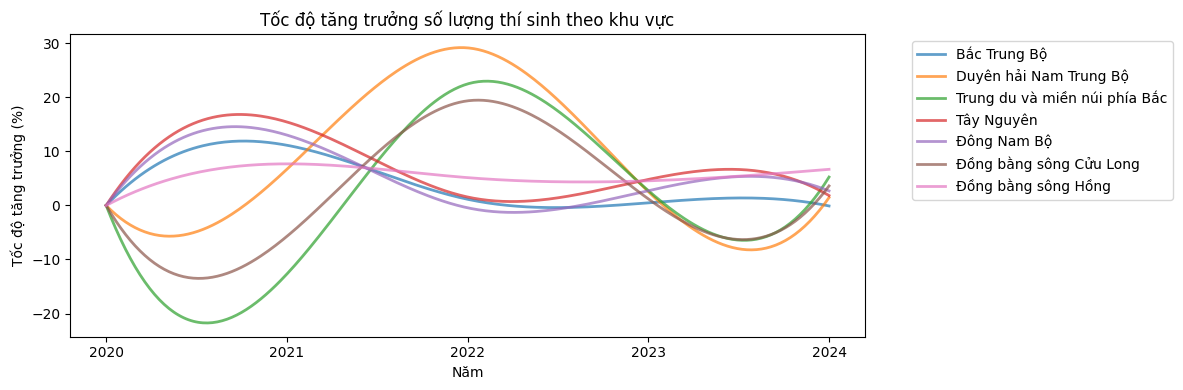

In [64]:
# Tính số lượng thí sinh mỗi năm theo khu vực
studen_region = data_all.groupby(['year', 'khu_vuc']).size().unstack()

# Tính tốc độ tăng trưởng
growth_region = studen_region.pct_change() * 100

growth_region = growth_region.apply(pd.to_numeric, errors='coerce')

# Xử lý các giá trị vô cùng và thay thế bằng NaN thay NaN bằng 0
growth_region.replace([np.inf, -np.inf], np.nan, inplace=True)
growth_region.fillna(0, inplace=True)

plt.figure(figsize=(12, 4))

# Duyệt qua từng khu vực để vẽ đường cho mỗi khu vực
for region in growth_region.columns:
    x = growth_region.index
    y = growth_region[region]

    x_num = pd.to_numeric(x, errors='coerce')

    #làm mịn đường
    x_new = np.linspace(x_num.min(), x_num.max(), 300)
    spl = make_interp_spline(x_num, y, k=3)
    y_smooth = spl(x_new)

    # Vẽ đường
    plt.plot(x_new, y_smooth, label=region, linewidth=2, alpha=0.7)

plt.title('Tốc độ tăng trưởng số lượng thí sinh theo khu vực')
plt.xlabel('Năm')
plt.ylabel('Tốc độ tăng trưởng (%)')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid(False)
plt.xticks(x_num)
plt.tight_layout()
plt.show()

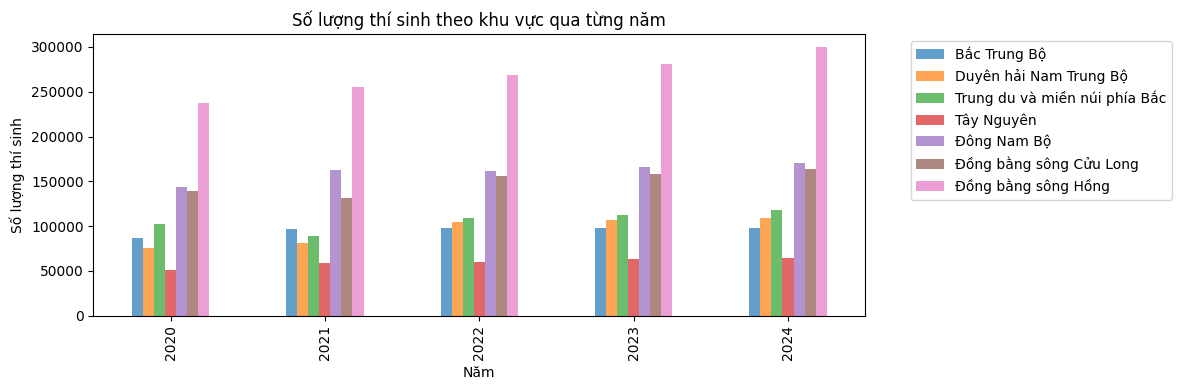

In [65]:
#số lượng thí sinh mỗi năm theo khu vưc
students_region = data_all.groupby(['year', 'khu_vuc']).size().unstack()

#so sánh lượng thí sinh mỗi khu vực qua từng năm
students_region.plot(kind='bar', figsize=(12, 4),alpha=0.7)

plt.title('Số lượng thí sinh theo khu vực qua từng năm')
plt.xlabel('Năm')
plt.ylabel('Số lượng thí sinh')

plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1),)
plt.tight_layout()
plt.grid(False)
plt.show()





Trung du miền núi phía Bắc

In [66]:
data_kv = data_all
data_kv['year'] = data_kv['year'].astype(str)

data_year_kv = (
    data_kv[data_kv['khu_vuc']=='Trung du và miền núi phía Bắc']
    .pivot_table(
        index='dia_phuong',
        columns='year',
        aggfunc='count',
        values='sbd',

    ).reset_index()
)

#so sánh tỉ lệ tăng giảm số lượng của 2 năm(2020 k có năm 2019 làm dữ liệu nên k tính)

data_year_kv['Tỉ_lệ_21'] = (
    (data_year_kv['2021'] - data_year_kv['2020']) / data_year_kv['2020']
)
data_year_kv['Tỉ_lệ_22'] = (
    (data_year_kv['2022'] - data_year_kv['2021']) / data_year_kv['2021']
)
data_year_kv['Tỉ_lệ_23'] = (
    (data_year_kv['2023'] - data_year_kv['2022']) / data_year_kv['2022']
)
data_year_kv['Tỉ_lệ_24'] = (
    (data_year_kv['2024'] - data_year_kv['2023']) / data_year_kv['2023']
)

# Tô màu cho bảng
(
    data_year_kv
    .sort_values(by='2021', ascending=False)
    .style.format({
        'Tỉ_lệ_21': '{:.0%}',
        'Tỉ_lệ_22': '{:.0%}',
        'Tỉ_lệ_23': '{:.0%}',
        'Tỉ_lệ_24': '{:.0%}'
    })
    .background_gradient(cmap='RdBu', subset=['Tỉ_lệ_21', 'Tỉ_lệ_22', 'Tỉ_lệ_23', 'Tỉ_lệ_24'])
)


year,dia_phuong,2020,2021,2022,2023,2024,Tỉ_lệ_21,Tỉ_lệ_22,Tỉ_lệ_23,Tỉ_lệ_24
7,Phú Thọ,13810.000000,16151.000000,15808.000000,15874.000000,16382.000000,17%,-2%,0%,3%
9,Thái Nguyên,15190.000000,14840.000000,15083.000000,16153.000000,16713.000000,-2%,2%,7%,3%
6,Lạng Sơn,8510.000000,9530.000000,9608.000000,9353.000000,9469.000000,12%,1%,-3%,1%
3,Hòa Binh,9151.000000,9478.000000,9575.000000,9690.000000,9823.000000,4%,1%,1%,1%
10,Tuyên Quang,7995.000000,8680.000000,8425.000000,8392.000000,8984.000000,9%,-3%,-0%,7%
5,Lào Cai,6355.000000,7331.000000,7204.000000,7866.000000,8356.000000,15%,-2%,9%,6%
12,Điện Biên,5608.000000,6268.000000,6413.000000,6685.000000,7216.000000,12%,2%,4%,8%
2,Hà Giang,5627.000000,5603.000000,5863.000000,6286.000000,6920.000000,-0%,5%,7%,10%
1,Cao Bằng,4598.000000,4738.000000,5043.000000,5046.000000,5506.000000,3%,6%,0%,9%
4,Lai Châu,3298.000000,3563.000000,3662.000000,3838.000000,4188.000000,8%,3%,5%,9%


Đồng Bằng sông Hồng

In [67]:
data_kv = data_all
data_kv['year'] = data_kv['year'].astype(str)

data_year_kv = (
    data_kv[data_kv['khu_vuc']=='Đồng bằng sông Hồng']
    .pivot_table(
        index='dia_phuong',
        columns='year',
        aggfunc='count',
        values='sbd',

    ).reset_index()
)

#so sánh tỉ lệ tăng giảm số lượng của 2 năm(2020 k có năm 2019 làm dữ liệu nên k tính)

data_year_kv['Tỉ_lệ_21'] = (
    (data_year_kv['2021'] - data_year_kv['2020']) / data_year_kv['2020']
)
data_year_kv['Tỉ_lệ_22'] = (
    (data_year_kv['2022'] - data_year_kv['2021']) / data_year_kv['2021']
)
data_year_kv['Tỉ_lệ_23'] = (
    (data_year_kv['2023'] - data_year_kv['2022']) / data_year_kv['2022']
)
data_year_kv['Tỉ_lệ_24'] = (
    (data_year_kv['2024'] - data_year_kv['2023']) / data_year_kv['2023']
)

# Tô màu cho bảng
(
    data_year_kv
    .sort_values(by='2021', ascending=False)
    .style.format({
        'Tỉ_lệ_21': '{:.0%}',
        'Tỉ_lệ_22': '{:.0%}',
        'Tỉ_lệ_23': '{:.0%}',
        'Tỉ_lệ_24': '{:.0%}'
    })
    .background_gradient(cmap='RdBu', subset=['Tỉ_lệ_21', 'Tỉ_lệ_22', 'Tỉ_lệ_23', 'Tỉ_lệ_24'])
)


year,dia_phuong,2020,2021,2022,2023,2024,Tỉ_lệ_21,Tỉ_lệ_22,Tỉ_lệ_23,Tỉ_lệ_24
3,Hà Nội,78860,100691,96942,102095,107867,28%,-4%,5%,6%
6,Hải Phòng,18533,23241,22399,22723,25530,25%,-4%,1%,12%
9,Thái Bình,19592,22858,20145,20845,22580,17%,-12%,3%,8%
5,Hải Dương,19583,22263,20422,21934,23366,14%,-8%,7%,7%
7,Nam Định,18667,20917,19769,20405,21760,12%,-5%,3%,7%
8,Quảng Ninh,14547,16367,15624,16025,17848,13%,-5%,3%,11%
1,Bắc Ninh,14621,16336,15850,16724,17614,12%,-3%,6%,5%
10,Vĩnh Phúc,12171,14002,13873,14042,15461,15%,-1%,1%,10%
2,Hà Nam,8575,9670,9183,9635,9564,13%,-5%,5%,-1%
4,Hưng Yên,12780,8217,13885,15386,16329,-36%,69%,11%,6%


Bắc Trung Bộ

In [68]:
data_kv = data_all
data_kv['year'] = data_kv['year'].astype(str)

data_year_kv = (
    data_kv[data_kv['khu_vuc']=='Bắc Trung Bộ']
    .pivot_table(
        index='dia_phuong',
        columns='year',
        aggfunc='count',
        values='sbd',

    ).reset_index()
)

#so sánh tỉ lệ tăng giảm số lượng của 2 năm(2020 k có năm 2019 làm dữ liệu nên k tính)

data_year_kv['Tỉ_lệ_21'] = (
    (data_year_kv['2021'] - data_year_kv['2020']) / data_year_kv['2020']
)
data_year_kv['Tỉ_lệ_22'] = (
    (data_year_kv['2022'] - data_year_kv['2021']) / data_year_kv['2021']
)
data_year_kv['Tỉ_lệ_23'] = (
    (data_year_kv['2023'] - data_year_kv['2022']) / data_year_kv['2022']
)
data_year_kv['Tỉ_lệ_24'] = (
    (data_year_kv['2024'] - data_year_kv['2023']) / data_year_kv['2023']
)

# Tô màu cho bảng
(
    data_year_kv
    .sort_values(by='2021', ascending=False)
    .style.format({
        'Tỉ_lệ_21': '{:.0%}',
        'Tỉ_lệ_22': '{:.0%}',
        'Tỉ_lệ_23': '{:.0%}',
        'Tỉ_lệ_24': '{:.0%}'
    })
    .background_gradient(cmap='RdBu', subset=['Tỉ_lệ_21', 'Tỉ_lệ_22', 'Tỉ_lệ_23', 'Tỉ_lệ_24'])
)


year,dia_phuong,2020,2021,2022,2023,2024,Tỉ_lệ_21,Tỉ_lệ_22,Tỉ_lệ_23,Tỉ_lệ_24
1,Nghệ An,31072,34327,36564,36886,36729,10%,7%,1%,-0%
0,Hà Tĩnh,15308,17268,17304,17249,17004,13%,0%,-0%,-1%
5,Thừa Thiên -Huế,12514,13291,13296,13029,12774,6%,0%,-2%,-2%
2,Quảng Bình,10658,11902,11115,11168,11189,12%,-7%,0%,0%
4,Thanh Hóa,9219,11050,10501,11149,11749,20%,-5%,6%,5%
3,Quảng Trị,7897,8485,8643,8413,8359,7%,2%,-3%,-1%


Duyên hải Nam Trung Bộ

In [69]:
data_kv = data_all
data_kv['year'] = data_kv['year'].astype(str)

data_year_kv = (
    data_kv[data_kv['khu_vuc']=='Duyên hải Nam Trung Bộ']
    .pivot_table(
        index='dia_phuong',
        columns='year',
        aggfunc='count',
        values='sbd',

    ).reset_index()
)

#so sánh tỉ lệ tăng giảm số lượng của 2 năm(2020 k có năm 2019 làm dữ liệu nên k tính)

data_year_kv['Tỉ_lệ_21'] = (
    (data_year_kv['2021'] - data_year_kv['2020']) / data_year_kv['2020']
)
data_year_kv['Tỉ_lệ_22'] = (
    (data_year_kv['2022'] - data_year_kv['2021']) / data_year_kv['2021']
)
data_year_kv['Tỉ_lệ_23'] = (
    (data_year_kv['2023'] - data_year_kv['2022']) / data_year_kv['2022']
)
data_year_kv['Tỉ_lệ_24'] = (
    (data_year_kv['2024'] - data_year_kv['2023']) / data_year_kv['2023']
)

# Tô màu cho bảng
(
    data_year_kv
    .sort_values(by='2021', ascending=False)
    .style.format({
        'Tỉ_lệ_21': '{:.0%}',
        'Tỉ_lệ_22': '{:.0%}',
        'Tỉ_lệ_23': '{:.0%}',
        'Tỉ_lệ_24': '{:.0%}'
    })
    .background_gradient(cmap='RdBu', subset=['Tỉ_lệ_21', 'Tỉ_lệ_22', 'Tỉ_lệ_23', 'Tỉ_lệ_24'])
)


year,dia_phuong,2020,2021,2022,2023,2024,Tỉ_lệ_21,Tỉ_lệ_22,Tỉ_lệ_23,Tỉ_lệ_24
5,Quảng Nam,7280.000000,16701.000000,16739.000000,17197.000000,17292.000000,129%,0%,3%,1%
1,Bình Định,16876.000000,14551.000000,18489.000000,18897.000000,19342.000000,-14%,27%,2%,2%
2,Khánh Hoà,13094.000000,13847.000000,14025.000000,14487.000000,14388.000000,6%,1%,3%,-1%
7,Đà Nẵng,nan,12631.000000,12575.000000,13133.000000,13414.000000,nan%,-0%,4%,2%
0,Bình Thuận,10893.000000,12036.000000,12727.000000,12900.000000,13133.000000,10%,6%,1%,2%
3,Ninh Thuận,5717.000000,5972.000000,5875.000000,6121.000000,6288.000000,4%,-2%,4%,3%
4,Phú Yên,10078.000000,3549.000000,10874.000000,10666.000000,10622.000000,-65%,206%,-2%,-0%
6,Quảng Ngãi,11966.000000,1696.000000,13295.000000,13870.000000,14354.000000,-86%,684%,4%,3%


Tây Nguyên

In [70]:
data_kv = data_all
data_kv['year'] = data_kv['year'].astype(str)

data_year_kv = (
    data_kv[data_kv['khu_vuc']=='Tây Nguyên']
    .pivot_table(
        index='dia_phuong',
        columns='year',
        aggfunc='count',
        values='sbd',

    ).reset_index()
)

#so sánh tỉ lệ tăng giảm số lượng của 2 năm(2020 k có năm 2019 làm dữ liệu nên k tính)

data_year_kv['Tỉ_lệ_21'] = (
    (data_year_kv['2021'] - data_year_kv['2020']) / data_year_kv['2020']
)
data_year_kv['Tỉ_lệ_22'] = (
    (data_year_kv['2022'] - data_year_kv['2021']) / data_year_kv['2021']
)
data_year_kv['Tỉ_lệ_23'] = (
    (data_year_kv['2023'] - data_year_kv['2022']) / data_year_kv['2022']
)
data_year_kv['Tỉ_lệ_24'] = (
    (data_year_kv['2024'] - data_year_kv['2023']) / data_year_kv['2023']
)

# Tô màu cho bảng
(
    data_year_kv
    .sort_values(by='2021', ascending=False)
    .style.format({
        'Tỉ_lệ_21': '{:.0%}',
        'Tỉ_lệ_22': '{:.0%}',
        'Tỉ_lệ_23': '{:.0%}',
        'Tỉ_lệ_24': '{:.0%}'
    })
    .background_gradient(cmap='RdBu', subset=['Tỉ_lệ_21', 'Tỉ_lệ_22', 'Tỉ_lệ_23', 'Tỉ_lệ_24'])
)


year,dia_phuong,2020,2021,2022,2023,2024,Tỉ_lệ_21,Tỉ_lệ_22,Tỉ_lệ_23,Tỉ_lệ_24
4,Đắk Lắk,13945,19767,20348,21042,20865,42%,3%,3%,-1%
2,Lâm Đồng,13497,14169,14102,14687,15372,5%,-0%,4%,5%
0,Gia Lai,13315,13937,14075,14861,15201,5%,1%,6%,2%
3,Đăk Nông,6212,6679,6852,7384,7681,8%,3%,8%,4%
1,Kon Tum,4294,4631,4730,5028,5038,8%,2%,6%,0%


Đồng bằng sông Cửu Long

In [71]:
data_kv = data_all
data_kv['year'] = data_kv['year'].astype(str)

data_year_kv = (
    data_kv[data_kv['khu_vuc']=='Đồng bằng sông Cửu Long']
    .pivot_table(
        index='dia_phuong',
        columns='year',
        aggfunc='count',
        values='sbd',

    ).reset_index()
)

#so sánh tỉ lệ tăng giảm số lượng của 2 năm(2020 k có năm 2019 làm dữ liệu nên k tính)

data_year_kv['Tỉ_lệ_21'] = (
    (data_year_kv['2021'] - data_year_kv['2020']) / data_year_kv['2020']
)
data_year_kv['Tỉ_lệ_22'] = (
    (data_year_kv['2022'] - data_year_kv['2021']) / data_year_kv['2021']
)
data_year_kv['Tỉ_lệ_23'] = (
    (data_year_kv['2023'] - data_year_kv['2022']) / data_year_kv['2022']
)
data_year_kv['Tỉ_lệ_24'] = (
    (data_year_kv['2024'] - data_year_kv['2023']) / data_year_kv['2023']
)

# Tô màu cho bảng
(
    data_year_kv
    .sort_values(by='2021', ascending=False)
    .style.format({
        'Tỉ_lệ_21': '{:.0%}',
        'Tỉ_lệ_22': '{:.0%}',
        'Tỉ_lệ_23': '{:.0%}',
        'Tỉ_lệ_24': '{:.0%}'
    })
    .background_gradient(cmap='RdBu', subset=['Tỉ_lệ_21', 'Tỉ_lệ_22', 'Tỉ_lệ_23', 'Tỉ_lệ_24'])
)


year,dia_phuong,2020,2021,2022,2023,2024,Tỉ_lệ_21,Tỉ_lệ_22,Tỉ_lệ_23,Tỉ_lệ_24
7,Long An,13850.000000,16353.000000,15321.000000,15653.000000,15771.000000,18%,-6%,2%,1%
9,Tiền Giang,14283.000000,16202.000000,15028.000000,15455.000000,16273.000000,13%,-7%,3%,5%
6,Kiên Giang,12434.000000,13700.000000,14325.000000,14423.000000,15035.000000,10%,5%,1%,4%
2,Bến Tre,11313.000000,13178.000000,12301.000000,12117.000000,12145.000000,16%,-7%,-1%,0%
4,Cần Thơ,10648.000000,12113.000000,12195.000000,12061.000000,12841.000000,14%,1%,-1%,6%
11,Vĩnh Long,10215.000000,11327.000000,10327.000000,10435.000000,10913.000000,11%,-9%,1%,5%
3,Cà Mau,9637.000000,10914.000000,10692.000000,9776.000000,10151.000000,13%,-2%,-9%,4%
8,Sóc Trăng,8514.000000,9625.000000,9985.000000,10045.000000,10642.000000,13%,4%,1%,6%
10,Trà Vinh,7890.000000,8806.000000,9461.000000,9196.000000,9686.000000,12%,7%,-3%,5%
5,Hậu Giang,5813.000000,6815.000000,6549.000000,6937.000000,7261.000000,17%,-4%,6%,5%


Đông Nam Bộ

In [72]:
data_kv = data_all
data_kv['year'] = data_kv['year'].astype(str)

data_year_kv = (
    data_kv[data_kv['khu_vuc']=='Đông Nam Bộ']
    .pivot_table(
        index='dia_phuong',
        columns='year',
        aggfunc='count',
        values='sbd',

    ).reset_index()
)

#so sánh tỉ lệ tăng giảm số lượng của 2 năm(2020 k có năm 2019 làm dữ liệu nên k tính)

data_year_kv['Tỉ_lệ_21'] = (
    (data_year_kv['2021'] - data_year_kv['2020']) / data_year_kv['2020']
)
data_year_kv['Tỉ_lệ_22'] = (
    (data_year_kv['2022'] - data_year_kv['2021']) / data_year_kv['2021']
)
data_year_kv['Tỉ_lệ_23'] = (
    (data_year_kv['2023'] - data_year_kv['2022']) / data_year_kv['2022']
)
data_year_kv['Tỉ_lệ_24'] = (
    (data_year_kv['2024'] - data_year_kv['2023']) / data_year_kv['2023']
)

# Tô màu cho bảng
(
    data_year_kv
    .sort_values(by='2021', ascending=False)
    .style.format({
        'Tỉ_lệ_21': '{:.0%}',
        'Tỉ_lệ_22': '{:.0%}',
        'Tỉ_lệ_23': '{:.0%}',
        'Tỉ_lệ_24': '{:.0%}'
    })
    .background_gradient(cmap='RdBu', subset=['Tỉ_lệ_21', 'Tỉ_lệ_22', 'Tỉ_lệ_23', 'Tỉ_lệ_24'])
)


year,dia_phuong,2020,2021,2022,2023,2024,Tỉ_lệ_21,Tỉ_lệ_22,Tỉ_lệ_23,Tỉ_lệ_24
3,Hồ Chí Minh,74451,86259,84596,84851,87322,16%,-2%,0%,3%
5,Đồng Nai,28254,30366,31363,33158,33800,7%,3%,6%,2%
1,Bình Dương,11386,12999,12797,14218,15239,14%,-2%,11%,7%
0,Bà Rịa-Vũng Tàu,11441,12959,12661,12925,12635,13%,-2%,2%,-2%
2,Bình Phước,9774,10362,10702,10930,11304,6%,3%,2%,3%
4,Tây Ninh,8544,9644,9763,10229,10486,13%,1%,5%,3%


Số lượng thí sinh đạt điểm cao(>=54) tổng tất cả các môn theo khu vực

<Figure size 1400x700 with 0 Axes>

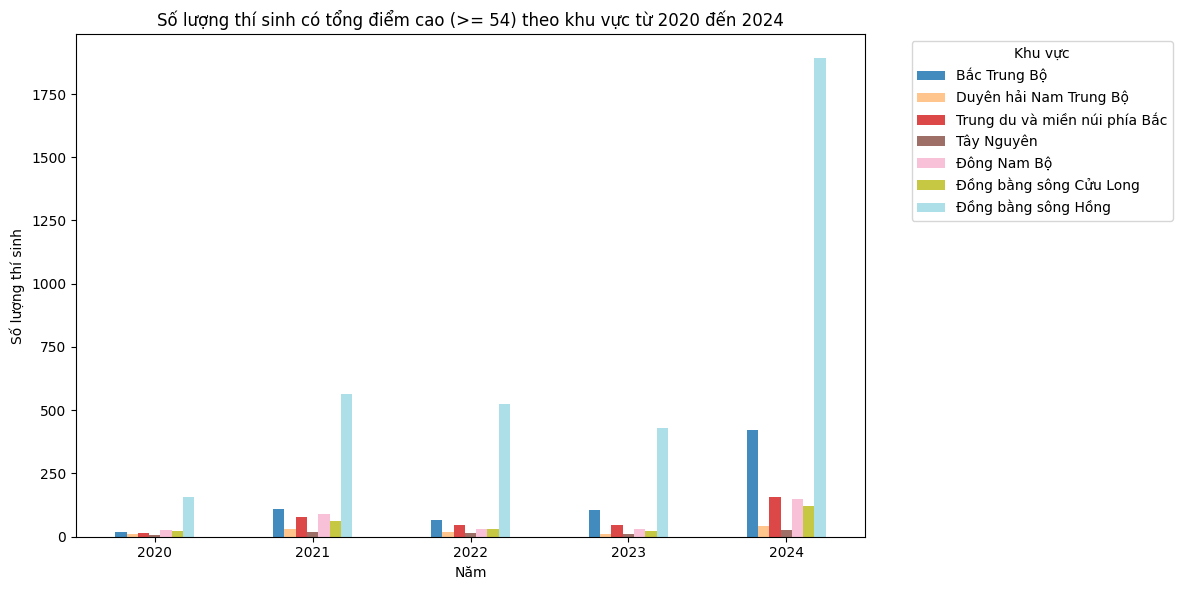

In [73]:
# tính và lọc số lượng thí sinh>=54 điểm
data_all['tong_diem'] = data_all[['toan', 'ngu_van', 'vat_ly', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_ly', 'gdcd', 'ngoai_ngu']].sum(axis=1)


data_all['year'] = pd.to_numeric(data_all['year'], errors='coerce')

data_tong_diem_54 = data_all[(data_all['tong_diem'] >= 54) & (data_all['year'].between(2020, 2024))]

#Đếm số lượng học sinh có tổng điểm >= 54 cho mỗi khu vực và mỗi năm.
students_region_tong_54 = data_tong_diem_54.groupby(['year', 'khu_vuc']).size().unstack(fill_value=0)

#Vẽ màu
plt.figure(figsize=(14, 7))
students_region_tong_54.plot(kind='bar', stacked=False, colormap='tab20', alpha=0.85, figsize=(12, 6))

plt.title('Số lượng thí sinh có tổng điểm cao (>= 54) theo khu vực từ 2020 đến 2024')
plt.xlabel('Năm')
plt.ylabel('Số lượng thí sinh')

# căn chỉnh
plt.xticks(rotation=0, ha='center')
plt.legend(title="Khu vực", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Số lượng thí sinh đạt điểm thấp(<=30) tổng tất cả các môn theo khu vực

<Figure size 1400x700 with 0 Axes>

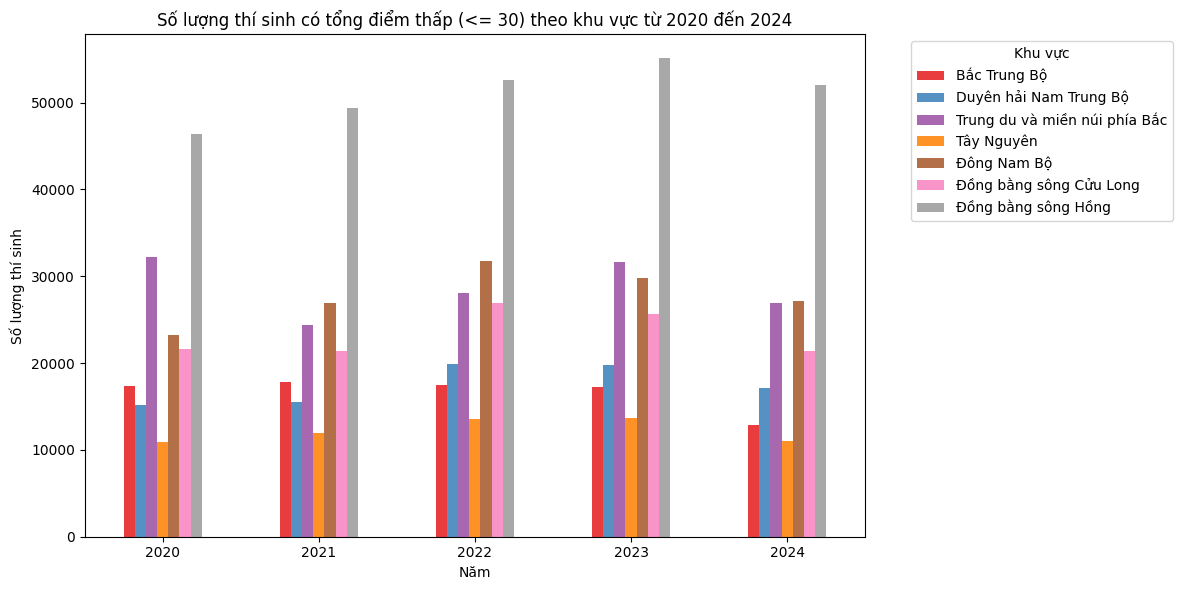

In [74]:

# tính và lọc số lượng thí sinh>=54 điểm
data_all['tong_diem'] = data_all[['toan', 'ngu_van', 'vat_ly', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_ly', 'gdcd', 'ngoai_ngu']].sum(axis=1)
data_tong_diem_30 = data_all[(data_all['tong_diem'] <= 30) & (data_all['year'].between(2020, 2024))]

#Đếm số lượng học sinh có tổng điểm >= 54 cho mỗi khu vực và mỗi năm.
students_region_tong_30 = data_tong_diem_30.groupby(['year', 'khu_vuc']).size().unstack(fill_value=0)

#Vẽ màu
plt.figure(figsize=(14, 7))
students_region_tong_30.plot(kind='bar', stacked=False, colormap='Set1', alpha=0.85, figsize=(12, 6))

plt.title('Số lượng thí sinh có tổng điểm thấp (<= 30) theo khu vực từ 2020 đến 2024')
plt.xlabel('Năm')
plt.ylabel('Số lượng thí sinh')

# căn chỉnh
plt.xticks(rotation=0, ha='center')
plt.legend(title="Khu vực", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()
